In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

2023-03-07 23:02:49.754738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 23:02:50.365100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-03-07 23:02:50.365187: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-03-07 23:02:50.365194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.c

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2023-03-07 23:02:51.235517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 23:02:51.241939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 23:02:51.241994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def load_data(path, col=None, verbose=False):
    df = pd.read_csv(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df

data_path = "/mnt/d/Learning/tensorflow_learning/datasets/Stock_data/IBM.csv"
multivar_df = load_data(data_path)

multivar_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,80.783936,83.652008,80.425430,81.082695,47.052982,8375531
1,2001-01-03,80.066925,90.822182,80.066925,90.463669,52.496819,13357315
2,2001-01-04,90.583176,95.363289,88.611374,89.089386,51.699326,16129843
3,2001-01-05,89.806404,90.523422,86.998085,89.866158,52.150112,8413187
4,2001-01-08,89.388145,89.806404,87.535851,89.447899,51.907368,6343781
...,...,...,...,...,...,...,...
5506,2022-11-18,146.559998,148.309998,145.940002,147.639999,147.639999,4659700
5507,2022-11-21,147.550003,147.929993,146.449997,146.679993,146.679993,3476200
5508,2022-11-22,147.600006,149.350006,147.020004,149.100006,149.100006,7062100
5509,2022-11-23,149.100006,150.460007,148.300003,148.750000,148.750000,3658200


In [4]:
colname = multivar_df.pop("Close")
multivar_df.insert(0, "Price", colname)

In [5]:
multivar_df

,Price,Date,Open,High,Low,Adj Close,Volume
0,81.082695,2001-01-02,80.783936,83.652008,80.425430,47.052982,8375531
1,90.463669,2001-01-03,80.066925,90.822182,80.066925,52.496819,13357315
2,89.089386,2001-01-04,90.583176,95.363289,88.611374,51.699326,16129843
3,89.866158,2001-01-05,89.806404,90.523422,86.998085,52.150112,8413187
4,89.447899,2001-01-08,89.388145,89.806404,87.535851,51.907368,6343781
...,...,...,...,...,...,...,...
5506,147.639999,2022-11-18,146.559998,148.309998,145.940002,147.639999,4659700
5507,146.679993,2022-11-21,147.550003,147.929993,146.449997,146.679993,3476200
5508,149.100006,2022-11-22,147.600006,149.350006,147.020004,149.100006,7062100
5509,148.750000,2022-11-23,149.100006,150.460007,148.300003,148.750000,3658200


In [6]:
def clean_data(series):
    """Fills missing values. 
    
        Interpolate missing values with a linear approximation.
    """
    series_filled = series.interpolate(method='linear')
        
    return series_filled
        
    
def min_max_scale(dataframe):
    """ Applies MinMax Scaling
    
        Wrapper for sklearn's MinMaxScaler class.
    """
    mm = MinMaxScaler()
    return mm.fit_transform(dataframe)

In [7]:
def make_time_features(series):
    
    #convert series to datetimes
    datetimes = pd.DatetimeIndex(series)
    
    days = datetimes.day.values
    months = datetimes.month.values
    years = datetimes.year.values
    
    day = pd.Series(days, name='day')
    month = pd.Series(months, name='months')
    year = pd.Series(years, name='year')
    
    return day, month, year

In [8]:
def split_data(series, train_fraq):
    """Splits input series into train, val and test.
    
        Default to 1 year of test data.
    """
    #make train and validation from the remaining
    train_val_data = series
    train_size = int(len(train_val_data) * train_fraq)
    
    train_data = train_val_data[:train_size]
    val_data = train_val_data[train_size:]
    test_data = val_data
    
    return train_data, val_data, test_data

In [9]:
def window_dataset(data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=False, expand_dims=False):
    """ Create a windowed tensorflow dataset
    
    """

    #create a window with n steps back plus the size of the prediction length
    window = n_steps + n_horizon
    
    #expand dimensions to 3D to fit with LSTM inputs
    #creat the inital tensor dataset
    if expand_dims:
        ds = tf.expand_dims(data, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(ds)
    else:
        ds = tf.data.Dataset.from_tensor_slices(data)
    
    #create the window function shifting the data by the prediction length
    ds = ds.window(window, shift=n_horizon, drop_remainder=True)
    
    #flatten the dataset and batch into the window size
    ds = ds.flat_map(lambda x : x.batch(window))
    ds = ds.shuffle(shuffle_buffer)    
    
    #create the supervised learning problem x and y and batch
    if multi_var:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:, :1]))
    else:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:]))
    
    ds = ds.batch(batch_size).prefetch(1)
    
    return ds

In [10]:
df = load_data(data_path, col=['Close', 'Date', 'High', 'Low', 'Adj Close', "Volume"])
df

,Close,Date,High,Low,Adj Close,Volume
0,81.082695,2001-01-02,83.652008,80.425430,47.052982,8375531
1,90.463669,2001-01-03,90.822182,80.066925,52.496819,13357315
2,89.089386,2001-01-04,95.363289,88.611374,51.699326,16129843
3,89.866158,2001-01-05,90.523422,86.998085,52.150112,8413187
4,89.447899,2001-01-08,89.806404,87.535851,51.907368,6343781
...,...,...,...,...,...,...
5506,147.639999,2022-11-18,148.309998,145.940002,147.639999,4659700
5507,146.679993,2022-11-21,147.929993,146.449997,146.679993,3476200
5508,149.100006,2022-11-22,149.350006,147.020004,149.100006,7062100
5509,148.750000,2022-11-23,150.460007,148.300003,148.750000,3658200


In [30]:
def build_dataset(train_fraq=0.80, n_steps=24, n_horizon=1, batch_size=256, shuffle_buffer=500, expand_dims=False, multi_var=False):
    """If multi variate then first column is always the column from which the target is contstructed.
    """
    
    tf.random.set_seed(23)
    data_path = "/mnt/d/Learning/tensorflow_learning/datasets/Stock_data/IBM.csv"
    if multi_var:
        data = load_data(data_path, col=['Close', 'Date', 'High', 'Low', 'Adj Close', "Volume"])
        day, months, years = make_time_features(data.Date)
        data = pd.concat([data.drop(['Date'], axis=1), day, months, years], axis=1)
    else:
        data = load_data(col=['total load actual'])
        
    data = clean_data(data)
    
    if multi_var:
        mm = MinMaxScaler()
        data = mm.fit_transform(data)
    
    train_data, val_data, test_data = split_data(data, train_fraq=train_fraq)
    
    train_ds = window_dataset(train_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    val_ds = window_dataset(val_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    test_ds = window_dataset(test_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    print(f"Prediction lookback (n_steps): {n_steps}")
    print(f"Prediction horizon (n_horizon): {n_horizon}")
    print(f"Batch Size: {batch_size}")
    print("Datasets:")
    print(train_ds.element_spec)
    
    return train_ds, val_ds, test_ds

In [33]:
build_dataset(multi_var=True)

Prediction lookback (n_steps): 24
Prediction horizon (n_horizon): 1
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>)

In [34]:
def get_params(multivar=False):
    lr = 3e-4
    n_steps=7
    n_horizon=1
    if multivar:
        n_features=8
    else:
        n_features=1
        
    return n_steps, n_horizon, n_features, lr

In [35]:
model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}

def get_callbacks(model_name):
  callbacks = []
  MC = tf.keras.callbacks.ModelCheckpoint(f'saved_models/ts_practice_4/{model_name}', monitor='val_loss', save_best_only='True', verbose=1)
  ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights='True')
  return [MC, ES]

def run_model(model_name, model_func, model_configs, epochs):
    
    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    train_ds, val_ds, test_ds = build_dataset(n_steps=n_steps, n_horizon=n_horizon, multi_var=True)

    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks= get_callbacks(model.name))

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

In [36]:
def dnn_model(n_steps, n_horizon, n_features, lr):
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(n_steps, n_features)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='dnn')
    
    loss=tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model


dnn = dnn_model(*get_params(multivar=True))
dnn.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 56)                0         
                                                                 
 dense (Dense)               (None, 128)               7296      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,937
Trainable params: 23,937
Non-trainable par

In [37]:
def cnn_model(n_steps, n_horizon, n_features, lr=3e-4):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="CNN")
    
    loss= tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

cnn = cnn_model(*get_params(multivar=True))
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             1088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             8256      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0       

In [38]:
def lstm_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(72, activation='relu', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm = lstm_model(*get_params(multivar=True))
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 72)             23328     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129    

In [39]:
def lstm_cnn_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.LSTM(72, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="lstm_cnn")
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm_cnn = lstm_cnn_model(*get_params(multivar=True))
lstm_cnn.summary()

Model: "lstm_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             1088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             8256      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 1, 72)             39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                232

In [40]:
def lstm_cnn_skip_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
   
    inputs = tf.keras.layers.Input(shape=(n_steps,n_features), name='main')
    
    conv1 = tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu')(inputs)
    max_pool_1 = tf.keras.layers.MaxPooling1D(2)(conv1)
    conv2 = tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu')(max_pool_1)
    max_pool_2 = tf.keras.layers.MaxPooling1D(2)(conv2)
    lstm_1 = tf.keras.layers.LSTM(72, activation='relu', return_sequences=True)(max_pool_2)
    lstm_2 = tf.keras.layers.LSTM(48, activation='relu', return_sequences=False)(lstm_1)
    flatten = tf.keras.layers.Flatten()(lstm_2)
    
    skip_flatten = tf.keras.layers.Flatten()(inputs)

    concat = tf.keras.layers.Concatenate(axis=-1)([flatten, skip_flatten])
    drop_1 = tf.keras.layers.Dropout(0.3)(concat)
    dense_1 = tf.keras.layers.Dense(128, activation='relu')(drop_1)
    drop_2 = tf.keras.layers.Dropout(0.3)(dense_1)
    output = tf.keras.layers.Dense(n_horizon)(drop_2)
    
    model = tf.keras.Model(inputs=inputs, outputs=output, name='lstm_skip')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm_skip = lstm_cnn_skip_model(*get_params(multivar=True))
lstm_skip.summary()

Model: "lstm_skip"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main (InputLayer)              [(None, 7, 8)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 6, 64)        1088        ['main[0][0]']                   
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 3, 64)        0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2, 64)        8256        ['max_pooling1d[0][0]']          
                                                                                          

In [41]:
model_configs=dict()
run_model("dnn", dnn_model, model_configs, epochs=150)
run_model("cnn", cnn_model, model_configs, epochs=150)
run_model("lstm", lstm_model, model_configs, epochs=150)
run_model("lstm_cnn", lstm_cnn_model, model_configs, epochs=150)
run_model("lstm_skip", lstm_cnn_skip_model, model_configs, epochs=150)

Prediction lookback (n_steps): 7
Prediction horizon (n_horizon): 1
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/150


2023-03-07 23:07:29.180591: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1c0242c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-07 23:07:29.180680: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-03-07 23:07:29.185533: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-07 23:07:29.248961: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-07 23:07:29.282722: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


     18/Unknown - 2s 23ms/step - loss: 0.0449 - mae: 0.2319
Epoch 1: val_loss improved from inf to 0.00113, saving model to saved_models/ts_practice_4/dnn
INFO:tensorflow:Assets written to: saved_models/ts_practice_4/dnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/dnn/assets


18/18 [==============================] - 3s 74ms/step - loss: 0.0449 - mae: 0.2319 - val_loss: 0.0011 - val_mae: 0.0382
Epoch 2/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0163 - mae: 0.1409
Epoch 2: val_loss improved from 0.00113 to 0.00064, saving model to saved_models/ts_practice_4/dnn
INFO:tensorflow:Assets written to: saved_models/ts_practice_4/dnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/dnn/assets


18/18 [==============================] - 1s 64ms/step - loss: 0.0163 - mae: 0.1413 - val_loss: 6.4449e-04 - val_mae: 0.0280
Epoch 3/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0125 - mae: 0.1221
Epoch 3: val_loss did not improve from 0.00064
18/18 [==============================] - 1s 36ms/step - loss: 0.0130 - mae: 0.1254 - val_loss: 0.0030 - val_mae: 0.0665
Epoch 4/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0098 - mae: 0.1096
Epoch 4: val_loss did not improve from 0.00064
18/18 [==============================] - 1s 37ms/step - loss: 0.0099 - mae: 0.1102 - val_loss: 6.7853e-04 - val_mae: 0.0297
Epoch 5/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0063 - mae: 0.0862
Epoch 5: val_loss did not improve from 0.00064
18/18 [==============================] - 1s 37ms/step - loss: 0.0063 - mae: 0.0870 - val_loss: 9.8406e-04 - val_mae: 0.0366
Epoch 6/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0051 - mae: 0.0779
Epoch 6

Prediction lookback (n_steps): 7
Prediction horizon (n_horizon): 1
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/150


2023-03-07 23:07:37.249055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-07 23:07:37.870849: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


     18/Unknown - 3s 31ms/step - loss: 0.0194 - mae: 0.1520
Epoch 1: val_loss improved from inf to 0.00070, saving model to saved_models/ts_practice_4/CNN


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/CNN/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/CNN/assets


18/18 [==============================] - 5s 99ms/step - loss: 0.0194 - mae: 0.1520 - val_loss: 7.0280e-04 - val_mae: 0.0298
Epoch 2/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0173 - mae: 0.1390
Epoch 2: val_loss did not improve from 0.00070
18/18 [==============================] - 1s 37ms/step - loss: 0.0181 - mae: 0.1443 - val_loss: 0.0191 - val_mae: 0.1895
Epoch 3/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0188 - mae: 0.1597
Epoch 3: val_loss did not improve from 0.00070
18/18 [==============================] - 1s 37ms/step - loss: 0.0176 - mae: 0.1530 - val_loss: 0.0033 - val_mae: 0.0717
Epoch 4/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0083 - mae: 0.0982
Epoch 4: val_loss did not improve from 0.00070
18/18 [==============================] - 1s 37ms/step - loss: 0.0083 - mae: 0.0991 - val_loss: 0.0012 - val_mae: 0.0374
Epoch 5/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0049 - mae: 0.0705
Epoch 5: val_lo

Epoch 1/150
     18/Unknown - 3s 55ms/step - loss: 0.0446 - mae: 0.2485
Epoch 1: val_loss improved from inf to 0.03730, saving model to saved_models/ts_practice_4/lstm
INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm/assets


18/18 [==============================] - 6s 206ms/step - loss: 0.0446 - mae: 0.2485 - val_loss: 0.0373 - val_mae: 0.2600
Epoch 2/150
18/18 [==============================] - ETA: 0s - loss: 0.0307 - mae: 0.2060
Epoch 2: val_loss improved from 0.03730 to 0.00280, saving model to saved_models/ts_practice_4/lstm
INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm/assets


18/18 [==============================] - 3s 191ms/step - loss: 0.0307 - mae: 0.2060 - val_loss: 0.0028 - val_mae: 0.0661
Epoch 3/150
17/18 [===========================>..] - ETA: 0s - loss: 0.0095 - mae: 0.1121
Epoch 3: val_loss improved from 0.00280 to 0.00052, saving model to saved_models/ts_practice_4/lstm
INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm/assets


18/18 [==============================] - 3s 195ms/step - loss: 0.0095 - mae: 0.1119 - val_loss: 5.2397e-04 - val_mae: 0.0253
Epoch 4/150
17/18 [===========================>..] - ETA: 0s - loss: 0.0062 - mae: 0.0830
Epoch 4: val_loss did not improve from 0.00052
18/18 [==============================] - 1s 65ms/step - loss: 0.0062 - mae: 0.0832 - val_loss: 8.0152e-04 - val_mae: 0.0320
Epoch 5/150
17/18 [===========================>..] - ETA: 0s - loss: 0.0070 - mae: 0.0880
Epoch 5: val_loss did not improve from 0.00052
18/18 [==============================] - 1s 62ms/step - loss: 0.0071 - mae: 0.0884 - val_loss: 0.0022 - val_mae: 0.0598
Epoch 6/150
18/18 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0960
Epoch 6: val_loss did not improve from 0.00052
18/18 [==============================] - 1s 64ms/step - loss: 0.0084 - mae: 0.0960 - val_loss: 0.0063 - val_mae: 0.1078
Epoch 7/150
18/18 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.0781
Epoch 7: v

Epoch 1/150
     17/Unknown - 3s 28ms/step - loss: 0.0533 - mae: 0.2741
Epoch 1: val_loss improved from inf to 0.01370, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 6s 210ms/step - loss: 0.0528 - mae: 0.2722 - val_loss: 0.0137 - val_mae: 0.1528
Epoch 2/150
18/18 [==============================] - ETA: 0s - loss: 0.0339 - mae: 0.2265
Epoch 2: val_loss improved from 0.01370 to 0.00625, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 3s 174ms/step - loss: 0.0339 - mae: 0.2265 - val_loss: 0.0062 - val_mae: 0.1003
Epoch 3/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0201 - mae: 0.1739
Epoch 3: val_loss did not improve from 0.00625
18/18 [==============================] - 1s 43ms/step - loss: 0.0184 - mae: 0.1641 - val_loss: 0.0158 - val_mae: 0.1742
Epoch 4/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0103 - mae: 0.1210
Epoch 4: val_loss improved from 0.00625 to 0.00508, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 3s 191ms/step - loss: 0.0103 - mae: 0.1207 - val_loss: 0.0051 - val_mae: 0.0928
Epoch 5/150
18/18 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0921
Epoch 5: val_loss improved from 0.00508 to 0.00248, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 3s 180ms/step - loss: 0.0069 - mae: 0.0921 - val_loss: 0.0025 - val_mae: 0.0619
Epoch 6/150
18/18 [==============================] - ETA: 0s - loss: 0.0066 - mae: 0.0883
Epoch 6: val_loss did not improve from 0.00248
18/18 [==============================] - 1s 41ms/step - loss: 0.0066 - mae: 0.0883 - val_loss: 0.0045 - val_mae: 0.0890
Epoch 7/150
18/18 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0732
Epoch 7: val_loss improved from 0.00248 to 0.00104, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 3s 189ms/step - loss: 0.0045 - mae: 0.0732 - val_loss: 0.0010 - val_mae: 0.0375
Epoch 8/150
18/18 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0615
Epoch 8: val_loss improved from 0.00104 to 0.00056, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 3s 181ms/step - loss: 0.0034 - mae: 0.0615 - val_loss: 5.6431e-04 - val_mae: 0.0260
Epoch 9/150
17/18 [===========================>..] - ETA: 0s - loss: 0.0036 - mae: 0.0619
Epoch 9: val_loss did not improve from 0.00056
18/18 [==============================] - 1s 44ms/step - loss: 0.0036 - mae: 0.0620 - val_loss: 6.1394e-04 - val_mae: 0.0276
Epoch 10/150
17/18 [===========================>..] - ETA: 0s - loss: 0.0030 - mae: 0.0568
Epoch 10: val_loss improved from 0.00056 to 0.00045, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 4s 210ms/step - loss: 0.0030 - mae: 0.0568 - val_loss: 4.5088e-04 - val_mae: 0.0225
Epoch 11/150
18/18 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0526
Epoch 11: val_loss improved from 0.00045 to 0.00034, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 3s 188ms/step - loss: 0.0025 - mae: 0.0526 - val_loss: 3.4107e-04 - val_mae: 0.0191
Epoch 12/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0022 - mae: 0.0489 
Epoch 12: val_loss did not improve from 0.00034
18/18 [==============================] - 1s 42ms/step - loss: 0.0022 - mae: 0.0498 - val_loss: 3.4887e-04 - val_mae: 0.0200
Epoch 13/150
18/18 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0489 
Epoch 13: val_loss improved from 0.00034 to 0.00032, saving model to saved_models/ts_practice_4/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_cnn/assets


18/18 [==============================] - 3s 177ms/step - loss: 0.0022 - mae: 0.0489 - val_loss: 3.2315e-04 - val_mae: 0.0186
Epoch 14/150
18/18 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0468 
Epoch 14: val_loss did not improve from 0.00032
18/18 [==============================] - 1s 40ms/step - loss: 0.0020 - mae: 0.0468 - val_loss: 3.2703e-04 - val_mae: 0.0187
Epoch 15/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0018 - mae: 0.0440  
Epoch 15: val_loss did not improve from 0.00032
18/18 [==============================] - 1s 40ms/step - loss: 0.0019 - mae: 0.0458 - val_loss: 3.3692e-04 - val_mae: 0.0188
Epoch 16/150
18/18 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0470 
Epoch 16: val_loss did not improve from 0.00032
18/18 [==============================] - 1s 41ms/step - loss: 0.0021 - mae: 0.0470 - val_loss: 3.3871e-04 - val_mae: 0.0188
Epoch 17/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0019 - mae

Epoch 1/150
     18/Unknown - 3s 27ms/step - loss: 0.0969 - mae: 0.3486
Epoch 1: val_loss improved from inf to 0.00371, saving model to saved_models/ts_practice_4/lstm_skip


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_skip/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_skip/assets


18/18 [==============================] - 6s 204ms/step - loss: 0.0969 - mae: 0.3486 - val_loss: 0.0037 - val_mae: 0.0665
Epoch 2/150
18/18 [==============================] - ETA: 0s - loss: 0.0509 - mae: 0.2437
Epoch 2: val_loss did not improve from 0.00371
18/18 [==============================] - 1s 40ms/step - loss: 0.0509 - mae: 0.2437 - val_loss: 0.0167 - val_mae: 0.1711
Epoch 3/150
18/18 [==============================] - ETA: 0s - loss: 0.0318 - mae: 0.1927
Epoch 3: val_loss did not improve from 0.00371
18/18 [==============================] - 1s 39ms/step - loss: 0.0318 - mae: 0.1927 - val_loss: 0.0060 - val_mae: 0.0911
Epoch 4/150
18/18 [==============================] - ETA: 0s - loss: 0.0208 - mae: 0.1586
Epoch 4: val_loss improved from 0.00371 to 0.00287, saving model to saved_models/ts_practice_4/lstm_skip


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_skip/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_skip/assets


18/18 [==============================] - 3s 173ms/step - loss: 0.0208 - mae: 0.1586 - val_loss: 0.0029 - val_mae: 0.0648
Epoch 5/150
18/18 [==============================] - ETA: 0s - loss: 0.0145 - mae: 0.1308
Epoch 5: val_loss improved from 0.00287 to 0.00254, saving model to saved_models/ts_practice_4/lstm_skip


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_skip/assets


INFO:tensorflow:Assets written to: saved_models/ts_practice_4/lstm_skip/assets


18/18 [==============================] - 3s 194ms/step - loss: 0.0145 - mae: 0.1308 - val_loss: 0.0025 - val_mae: 0.0606
Epoch 6/150
16/18 [=========================>....] - ETA: 0s - loss: 0.0126 - mae: 0.1216
Epoch 6: val_loss did not improve from 0.00254
18/18 [==============================] - 1s 41ms/step - loss: 0.0130 - mae: 0.1236 - val_loss: 0.0030 - val_mae: 0.0666
Epoch 7/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0124 - mae: 0.1203
Epoch 7: val_loss did not improve from 0.00254
18/18 [==============================] - 1s 39ms/step - loss: 0.0129 - mae: 0.1233 - val_loss: 0.0026 - val_mae: 0.0619
Epoch 8/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0093 - mae: 0.1054
Epoch 8: val_loss did not improve from 0.00254
18/18 [==============================] - 1s 41ms/step - loss: 0.0097 - mae: 0.1076 - val_loss: 0.0038 - val_mae: 0.0784
Epoch 9/150
15/18 [========================>.....] - ETA: 0s - loss: 0.0068 - mae: 0.0885
Epoch 9: val_loss 

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

Loss Curves


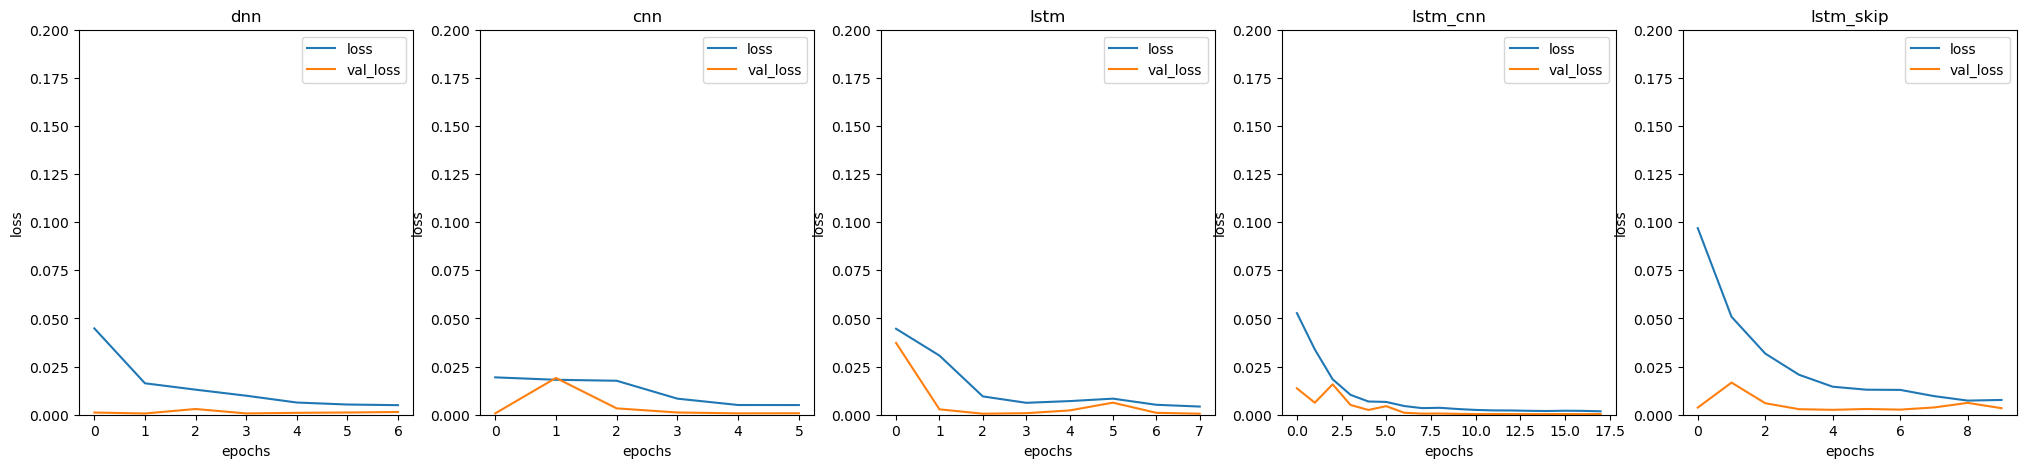

In [42]:
legend = list()

fig, axs = plt.subplots(1, 5, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 0.2)
print("Loss Curves")

MAE Curves


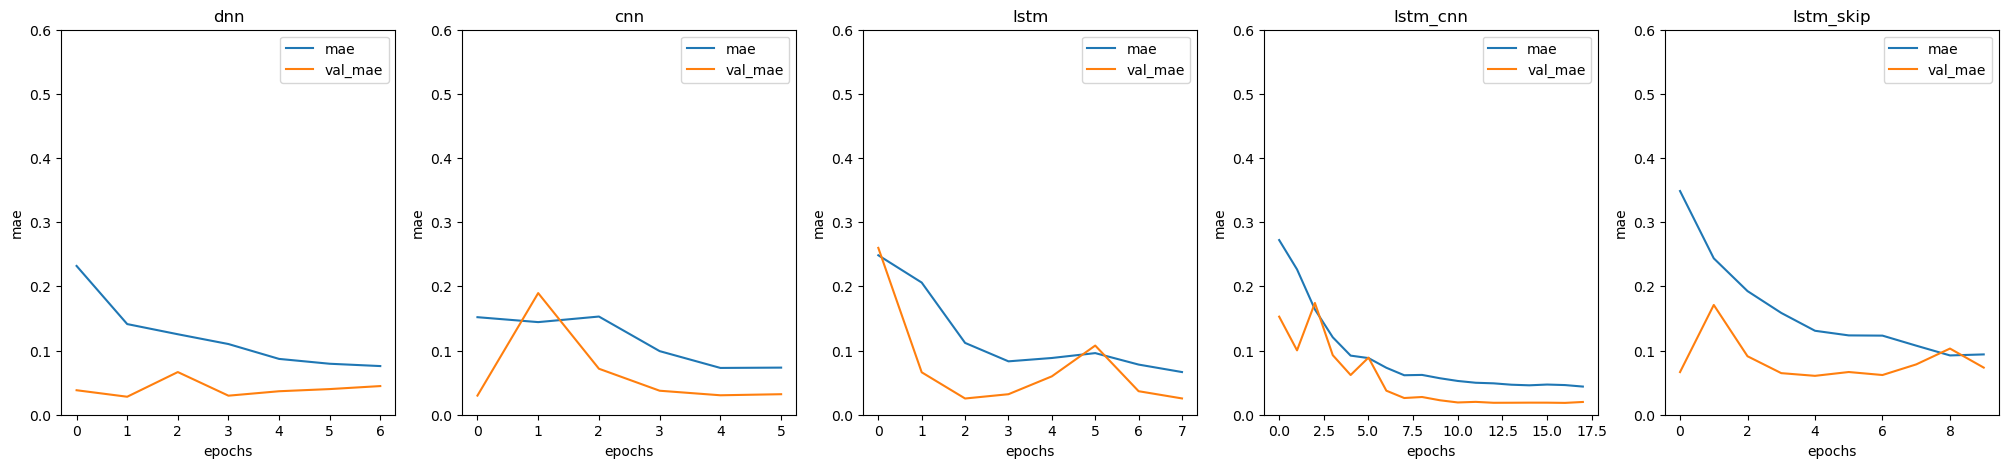

In [43]:
print("MAE Curves")
fig, axs = plt.subplots(1, 5, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mae', val, ax, 0.6)

In [46]:
names = list()
performance = list()

for key, value in model_configs.items():
    names.append(key)
    mae = value['model'].evaluate(value['test_ds'])
    performance.append(mae[1])
    
performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
performance_df['error_mw'] = performance_df['mae'] * df['Close'].mean()
print(performance_df)  

5/5 [==============================] - 0s 19ms/step - loss: 0.0025 - mae: 0.0606
                mae  error_mw
dnn        0.028027  3.503638
cnn        0.029784  3.723288
lstm       0.025287  3.161098
lstm_cnn   0.018607  2.326032
lstm_skip  0.060599  7.575519


5/5 [==============================] - 0s 17ms/step
First Two Weeks of Predictions


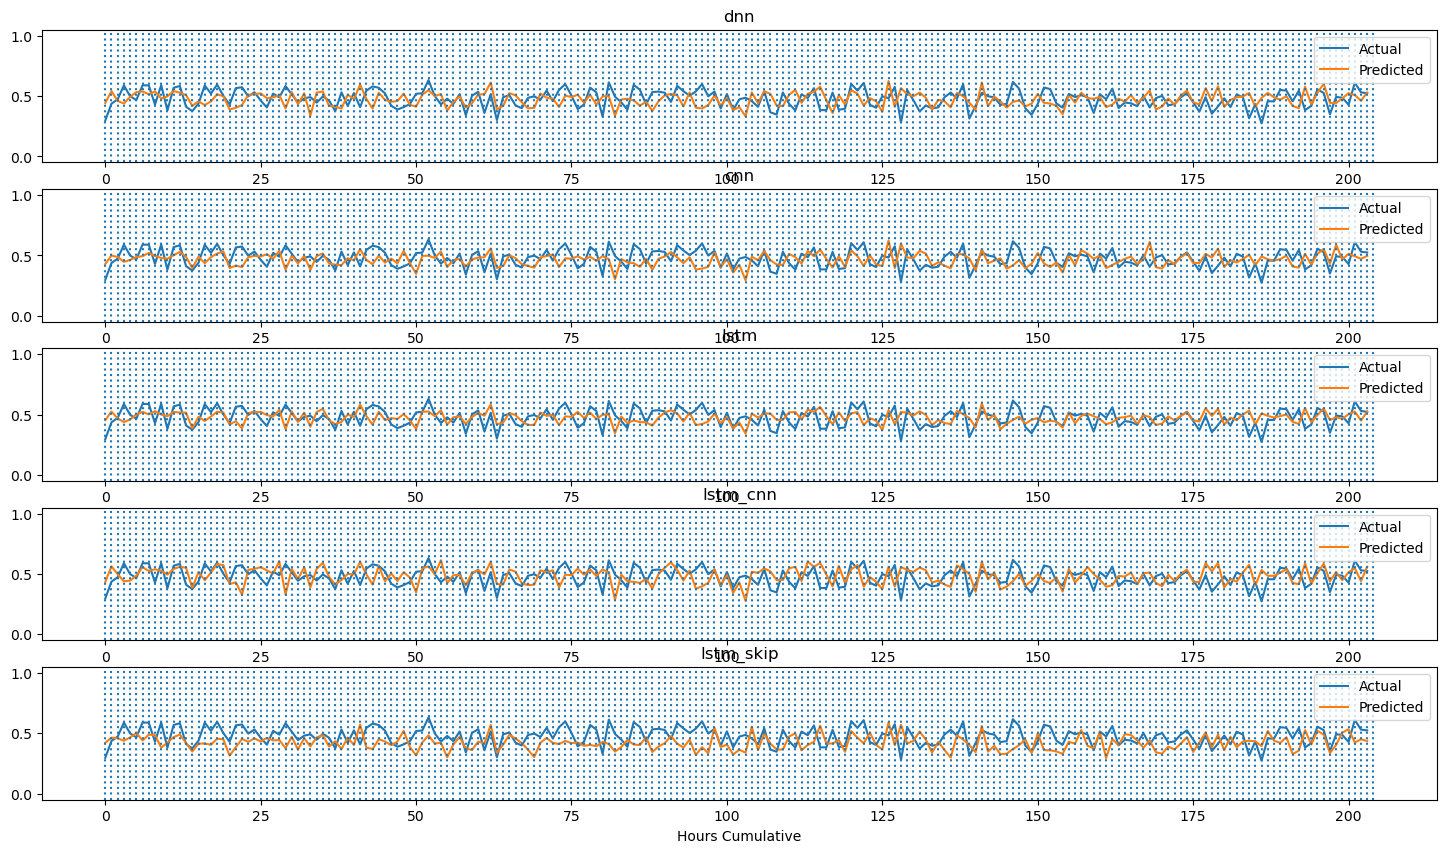

In [49]:
fig, axs = plt.subplots(5, 1, figsize=(18, 10))
days = 204

vline = np.linspace(0, days, days+1)

for (key, val), ax in zip(model_configs.items(), axs):

    test = val['test_ds']
    preds = val['model'].predict(test)

    xbatch, ybatch = iter(test).get_next()

    ax.plot(ybatch.numpy()[:days].reshape(-1))
    ax.plot(preds[:days].reshape(-1))
    ax.set_title(key)
    ax.vlines(vline, ymin=0, ymax=1, linestyle='dotted', transform = ax.get_xaxis_transform())
    ax.legend(["Actual", "Predicted"])

plt.xlabel("Hours Cumulative")
print('First Two Weeks of Predictions')